In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
H1b = pd.read_excel('H-1B_Disclosure_Data_FY2019.xlsx')

In [3]:
H1b.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,...,APPX_A_FIELD_OF_STUDY_3,APPX_A_DATE_OF_DEGREE_3,APPX_A_NO_OF_EXEMPT_WORKER_4,APPX_A_NAME_OF_INSTITUTION_4,APPX_A_FIELD_OF_STUDY_4,APPX_A_DATE_OF_DEGREE_4,APPX_A_NO_OF_EXEMPT_WORKER_5,APPX_A_NAME_OF_INSTITUTION_5,APPX_A_FIELD_OF_STUDY_5,APPX_A_DATE_OF_DEGREE_5
0,I-200-18269-520762,DENIED,2018-09-26,2018-10-01,NaT,H-1B,2018-09-26,2021-09-26,"NES GLOBAL, LLC",CANDACE ROMERO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I-200-18323-885516,DENIED,2018-11-19,2018-11-26,NaT,H-1B,2018-11-27,2021-11-26,UNIVERSITY OF TEXAS AT DALLAS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I-200-18323-882044,DENIED,2018-11-19,2018-11-26,NaT,H-1B,2018-11-28,2021-11-27,UNIVERSITY OF TEXAS AT DALLAS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I-200-18356-858057,DENIED,2018-12-22,2018-12-27,NaT,H-1B,2019-01-01,2022-01-01,BILLY R. WINGARD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I-200-19081-827349,CERTIFIED,2019-03-22,2019-03-28,NaT,H-1B,2019-04-01,2022-04-01,"COATES,BRIGHT & BAY LLC",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
clean = H1b.dropna(axis = 1, thresh= H1b.shape[0] / 3)
clean = clean.query('VISA_CLASS == "H-1B"')
clean = clean.query('CASE_STATUS != "WITHDRAWN"')
clean.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_CITY,...,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WILLFUL_VIOLATOR,SUPPORT_H1B
0,I-200-18269-520762,DENIED,2018-09-26,2018-10-01,H-1B,2018-09-26,2021-09-26,"NES GLOBAL, LLC",800 GESSNER ROAD,HOUSTON,...,36.00,0.00,Hour,N,HOUSTON,TX,FL,77024,N,NaN
1,I-200-18323-885516,DENIED,2018-11-19,2018-11-26,H-1B,2018-11-27,2021-11-26,UNIVERSITY OF TEXAS AT DALLAS,800 W CAMPBELL RD,RICHARDSON,...,50000.00,0.00,Year,N,Richardson,TX,TX,75080,N,NaN
2,I-200-18323-882044,DENIED,2018-11-19,2018-11-26,H-1B,2018-11-28,2021-11-27,UNIVERSITY OF TEXAS AT DALLAS,800 W CAMPBELL RD,RICHARDSON,...,207777.00,0.00,Year,N,Richardson,Dallas,TX,75080,N,NaN
3,I-200-18356-858057,DENIED,2018-12-22,2018-12-27,H-1B,2019-01-01,2022-01-01,BILLY R. WINGARD,4705 EDGEWOOD DRIVE,NEW BERN,...,7.95,7.95,Hour,N,New Bern,Craven,NC,28562,N,NaN
4,I-200-19081-827349,CERTIFIED,2019-03-22,2019-03-28,H-1B,2019-04-01,2022-04-01,"COATES,BRIGHT & BAY LLC",2820 PAN AMERICAN BLVD,NORTH PORT,...,8.46,10.00,Hour,Y,NORTH PORT,florida,FL,34287,N,N


## 2. Start & End Date

In [5]:
clean['Duration'] = clean.EMPLOYMENT_END_DATE - clean.EMPLOYMENT_START_DATE

In [6]:
print(clean.Duration.describe())
clean[['SOC_NAME', 'Duration']].sort_values(by = 'Duration',ascending = False).head(10)

count                       629857
mean     1067 days 03:38:15.040937
std       126 days 08:23:29.809572
min              -1 days +00:00:00
25%             1095 days 00:00:00
50%             1095 days 00:00:00
75%             1096 days 00:00:00
max             1460 days 00:00:00
Name: Duration, dtype: object


,SOC_NAME,Duration
305263,"SOFTWARE DEVELOPERS, APPLICATIONS",1460 days
631974,INDUSTRIAL ENGINEERS,1460 days
299404,"SOFTWARE DEVELOPERS, APPLICATIONS",1460 days
324448,"PHYSICIANS AND SURGEONS, ALL OTHER",1460 days
308198,"SOFTWARE DEVELOPERS, APPLICATIONS",1460 days
228249,"SOFTWARE DEVELOPERS, APPLICATIONS",1357 days
398914,"SOFTWARE DEVELOPERS, APPLICATIONS",1165 days
484631,MARINE ENGINEERS AND NAVAL ARCHITECTS,1126 days
29464,"ARCHITECTS, EXCEPT LANDSCAPE AND NAVAL",1112 days
23380,MICROBIOLOGISTS,1105 days


CASE_STATUS
CERTIFIED              AxesSubplot(0.125,0.125;0.775x0.755)
CERTIFIED-WITHDRAWN    AxesSubplot(0.125,0.125;0.775x0.755)
DENIED                 AxesSubplot(0.125,0.125;0.775x0.755)
Name: Duration, dtype: object

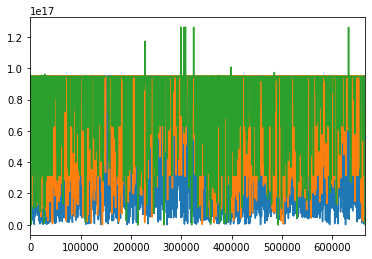

In [7]:
clean.groupby('CASE_STATUS')['Duration'].plot()

## 3. Employer Location

In [8]:
clean.groupby('EMPLOYER_CITY')['CASE_STATUS'].count().sort_values(ascending = False).head(10)

EMPLOYER_CITY
COLLEGE STATION    28884
NEW YORK           28480
CHICAGO            23068
RICHARDSON         22481
SAN FRANCISCO      14120
MOUNTAIN VIEW      13176
ROCKVILLE          12966
SEATTLE            12553
EDISON             12394
PHILADELPHIA       12363
Name: CASE_STATUS, dtype: int64

## 5. Employment Categories 

In [9]:
clean.groupby('SOC_NAME')['CASE_STATUS'].count().sort_values(ascending = False).head(10)


SOC_NAME
SOFTWARE DEVELOPERS, APPLICATIONS        208489
COMPUTER OCCUPATIONS, ALL OTHER           54486
COMPUTER SYSTEMS ANALYST                  40568
COMPUTER SYSTEMS ANALYSTS                 30615
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE     30580
COMPUTER PROGRAMMERS                      16439
OPERATIONS RESEARCH ANALYSTS              11388
MECHANICAL ENGINEERS                      11161
ACCOUNTANTS AND AUDITORS                  10282
MANAGEMENT ANALYSTS                        9521
Name: CASE_STATUS, dtype: int64

In [10]:
approval = clean.groupby('SOC_CODE')['CASE_STATUS'].value_counts().unstack('CASE_STATUS')
approval = approval.sort_values('CERTIFIED', ascending = False).head(50)
approval

CASE_STATUS,CERTIFIED,CERTIFIED-WITHDRAWN,DENIED
SOC_CODE,,,
15-1132,194786.0,12697.0,1253.0
15-1121,68535.0,2430.0,232.0
15-1199,58030.0,3059.0,327.0
15-1133,28368.0,2023.0,215.0
15-1131,15037.0,1494.0,91.0
15-2031,10716.0,631.0,65.0
17-2141,10333.0,749.0,92.0
13-2011,9823.0,342.0,151.0
13-1111,9249.0,487.0,110.0


In [11]:
import matplotlib.pyplot as plt

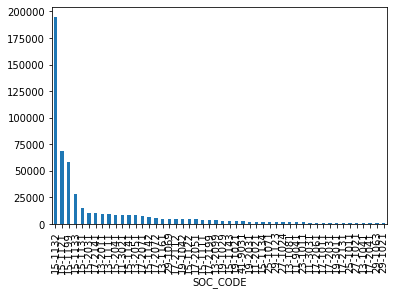

In [12]:
approval.CERTIFIED.plot.bar()

## 4. Legal Assistance

In [13]:
legal = clean.AGENT_REPRESENTING_EMPLOYER.value_counts(normalize = True) * 100
legal = legal.round(2)
legal

Y    70.21
N    29.79
Name: AGENT_REPRESENTING_EMPLOYER, dtype: float64

In [14]:
chance = clean.groupby('CASE_STATUS')["AGENT_REPRESENTING_EMPLOYER"].value_counts(normalize = True).unstack("AGENT_REPRESENTING_EMPLOYER")
chance

AGENT_REPRESENTING_EMPLOYER,N,Y
CASE_STATUS,,
CERTIFIED,0.297176,0.702824
CERTIFIED-WITHDRAWN,0.326251,0.673749
DENIED,0.295098,0.704902


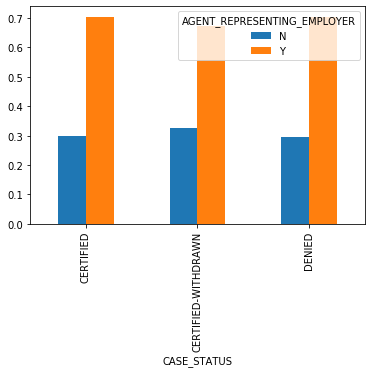

In [15]:
chance.plot.bar()

## 6. Employment Hours

In [16]:
full_prop = clean.FULL_TIME_POSITION.value_counts(normalize = True) * 100
full_prop = full_prop.round(2)
full_prop

Y    98.36
N     1.64
Name: FULL_TIME_POSITION, dtype: float64

An overwhelming percentage of 98.36% are full-time employees and only 1.64% are part-time employees.

In [17]:
full = clean.groupby('FULL_TIME_POSITION').CASE_STATUS.value_counts(normalize = True).unstack('CASE_STATUS')
full

CASE_STATUS,CERTIFIED,CERTIFIED-WITHDRAWN,DENIED
FULL_TIME_POSITION,,,
N,0.921764,0.045080,0.033156
Y,0.927719,0.064494,0.007786


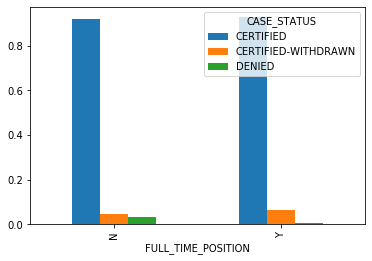

In [18]:
full.plot.bar()

Looking at the Although most applicants for the LCA are full-time workers, we would like to see if part-time employees enjoy equal opportunity in certification for H1B visa. Interestingly, based on percentages of certified status, we see that both full and part time workers have almost the same proportion certified applications (around 92%).

In [19]:
full = clean.groupby('FULL_TIME_POSITION').CASE_STATUS.value_counts().unstack('CASE_STATUS')
full

CASE_STATUS,CERTIFIED,CERTIFIED-WITHDRAWN,DENIED
FULL_TIME_POSITION,,,
N,9508,465,342
Y,574761,39957,4824


In [20]:
part = clean.query('FULL_TIME_POSITION == "N"')
part.SOC_NAME.value_counts().head(10)

ACCOUNTANTS AND AUDITORS                              1048
SOFTWARE DEVELOPERS, APPLICATIONS                      995
MARKET RESEARCH ANALYSTS AND MARKETING SPECIALISTS     525
FINANCIAL ANALYSTS                                     422
PHYSICIANS AND SURGEONS, ALL OTHER                     375
MANAGEMENT ANALYSTS                                    370
COMPUTER OCCUPATIONS, ALL OTHER                        344
PHYSICAL THERAPISTS                                    245
HEALTH SPECIALTIES TEACHERS, POSTSECONDARY             227
LAWYERS                                                189
Name: SOC_NAME, dtype: int64

Part-time employees mostly work as in the accounting/finance, software development, medical, and law fields.

In [85]:
city = pd.Series([i.upper() for i in part.WORKSITE_CITY.astype(str)])
print(city.value_counts().head(10))

NEW YORK            1090
LOS ANGELES          201
FLUSHING             186
HOUSTON              182
BROOKLYN             147
BOSTON               143
CITY OF INDUSTRY     139
CHICAGO              127
SAN JOSE             121
SAN FRANCISCO        107
dtype: int64


![US LCA Applications](img/colormap.png)

We are interested in the importance of location and how it correlates with whether an employer depends on international talent. Looking at the number of H1B dependent employers, it seems like companies in California, Texas, New York, and New Jersey heavily recruits international talent. 

## 7. Company's H1B Dependence

In [21]:
clean.groupby('EMPLOYER_NAME').CASE_STATUS.value_counts().sort_values(ascending = False).head(10)

EMPLOYER_NAME                           CASE_STATUS
COGNIZANT TECHNOLOGY SOLUTIONS US CORP  CERTIFIED      28105
INFOSYS LIMITED                         CERTIFIED      21401
TATA CONSULTANCY SERVICES LIMITED       CERTIFIED      11835
GOOGLE LLC                              CERTIFIED       9117
ERNST & YOUNG U.S. LLP                  CERTIFIED       8601
CAPGEMINI AMERICA INC                   CERTIFIED       7744
DELOITTE CONSULTING LLP                 CERTIFIED       7588
AMAZON.COM SERVICES, INC.               CERTIFIED       6714
MICROSOFT CORPORATION                   CERTIFIED       5889
ACCENTURE LLP                           CERTIFIED       5487
Name: CASE_STATUS, dtype: int64

## 8. Employee Location

In [21]:
location = pd.Series([i.upper() for i in clean.WORKSITE_CITY.astype(str)])
location.unique()

array(['HOUSTON', 'RICHARDSON', 'NEW BERN', ..., 'SMITHTOWN',
       'PRESTONSBURG', 'SHILOH'], dtype=object)

In [22]:
location.value_counts().head(10)

NEW YORK         35453
SAN FRANCISCO    18137
CHICAGO          12822
SUNNYVALE        12094
SEATTLE          11582
ATLANTA          11394
SAN JOSE         11218
HOUSTON          11179
AUSTIN            9273
MOUNTAIN VIEW     8978
dtype: int64

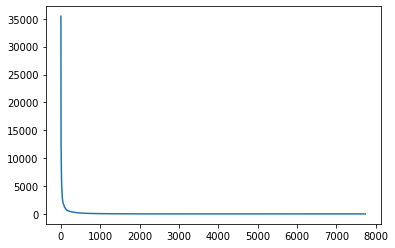

In [23]:
plt.plot(location.value_counts().reset_index().iloc[:,1])
plt.show()

In [24]:
clean.CASE_STATUS.value_counts(normalize = True)

CERTIFIED              0.927622
CERTIFIED-WITHDRAWN    0.064176
DENIED                 0.008202
Name: CASE_STATUS, dtype: float64

In [25]:
df = clean[['EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE']]

In [26]:
df.to_excel("df.xlsx")